In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
loan_df = pd.read_csv("loan.csv")
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [46]:
loan_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [47]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [48]:
loan_df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

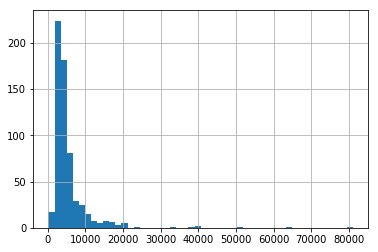

In [49]:
loan_df.ApplicantIncome.hist(bins=50)

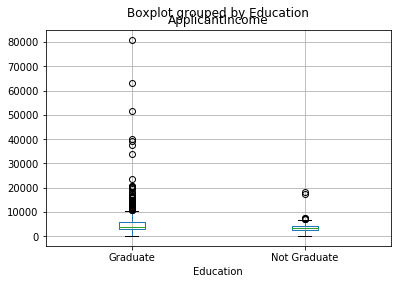

In [50]:
loan_df.boxplot(column='ApplicantIncome', by='Education')

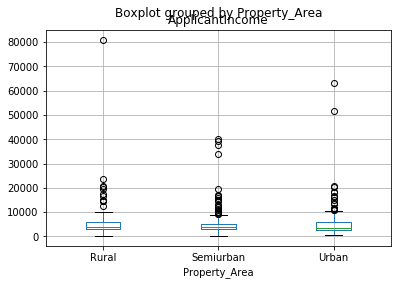

In [51]:
loan_df.boxplot(column='ApplicantIncome', by='Property_Area')

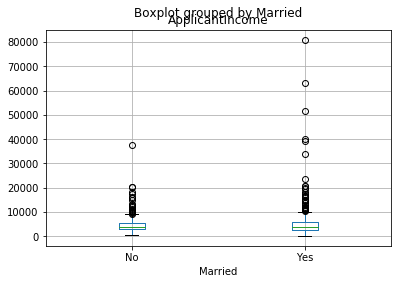

In [52]:
loan_df.boxplot(column='ApplicantIncome', by='Married')

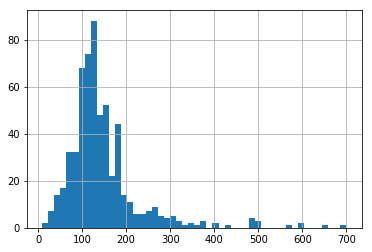

In [53]:
loan_df.LoanAmount.hist(bins=50)

In [54]:
temp1 = loan_df['Credit_History'].value_counts()

In [55]:
temp1

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [56]:
temp2 = loan_df.pivot_table(values='Loan_Status', index=['Credit_History'], aggfunc=(lambda x: x.map({'Y':1, 'N':0}).mean()))

In [57]:
temp2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


In [58]:
temp3 = loan_df.pivot_table(values='Loan_Status', index=['Married'], aggfunc=(lambda x: x.map({'Y':1, 'N':0}).mean()))
temp3

,Loan_Status
Married,
No,0.629108
Yes,0.716080


In [59]:
temp4 = loan_df.pivot_table(values='Loan_Status', index=['Self_Employed'], aggfunc=(lambda x: x.map({'Y':1, 'N':0}).mean()))
temp4

,Loan_Status
Self_Employed,
No,0.686000
Yes,0.682927


In [60]:
fig = plt.figure(figsize=(8,4))
# ax1 = fig.add_subplot(121)
ax1.set_xlabel("Credit history")
ax1.set_ylabel("count of applicants")
ax1.set_title("Applicants by credit history")
temp1.plot(kind='bar')

# ax2 = fig.add_subplot(122)
temp2.plot(kind='bar')
ax2.set_xlabel("credit history")
ax2.set_ylabel("probability of getting loan")
ax2.set_title("according to credit history probability of getting lone")

# ax3 = fig.add_subplot(211)
temp3.plot(kind='bar')
ax3.set_xlabel("Married")
ax3.set_ylabel("loan status")
ax3.set_title("probability of getting loan according to married status")

NameError: name 'ax1' is not defined

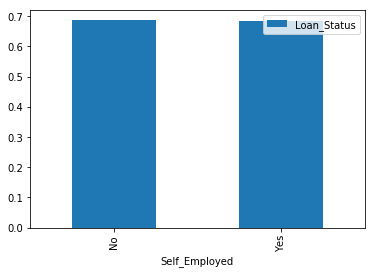

In [61]:
fig = plt.figure()
temp4.plot(kind='bar')

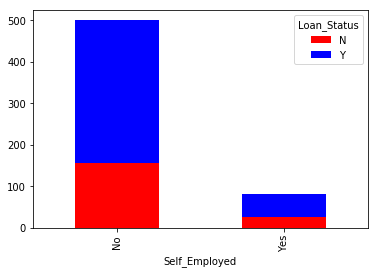

In [62]:
self_emp_stack = pd.crosstab(loan_df['Self_Employed'], loan_df['Loan_Status'])
self_emp_stack.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

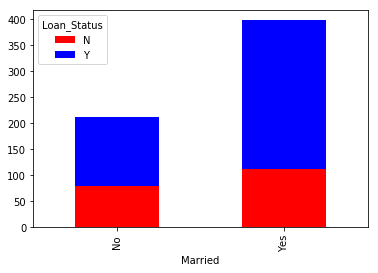

In [63]:
married_stack = pd.crosstab(loan_df['Married'], loan_df['Loan_Status'])
married_stack.plot(kind='bar', stacked=True, color=['red', 'blue'])

Checking for missing values

In [64]:
loan_df.apply(lambda x: sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [65]:
loan_df.LoanAmount.fillna(loan_df.LoanAmount.mean(), inplace=True)

In [66]:
loan_df.Self_Employed.fillna(loan_df.Self_Employed.mode()[0], inplace=True)

In [67]:
table = loan_df.pivot_table(values='LoanAmount', index='Self_Employed', columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,131.0,115.0
Yes,152.0,130.0


In [68]:
def fage(x):
    return table.loc[x['Education'], x['Self_Employed']]

In [69]:
loan_df.LoanAmount.fillna(loan_df[loan_df.LoanAmount.isnull()].apply(fage, axis=1), inplace = True)

ValueError: invalid fill value with a <class 'pandas.core.frame.DataFrame'>

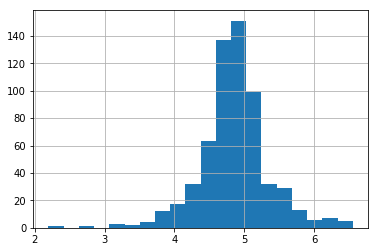

In [70]:
loan_df['LoanAmount_log'] = np.log(loan_df.LoanAmount)
loan_df.LoanAmount_log.hist(bins=20)

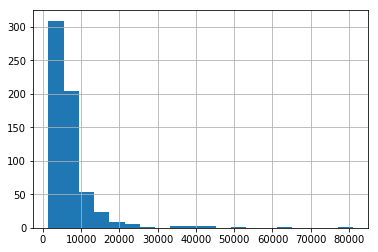

In [71]:
loan_df['Total_Income'] = loan_df['ApplicantIncome'] + loan_df['CoapplicantIncome']
loan_df.Total_Income.hist(bins=20)

In [72]:
loan_df.Married.fillna(loan_df.Married.mode()[0], inplace=True)

In [73]:
loan_df['Gender'].fillna(loan_df.Gender.mode()[0], inplace=True)

In [74]:
loan_df['Dependents'].fillna(loan_df.Dependents.mode()[0], inplace=True)

In [75]:
loan_df['Loan_Amount_Term'].fillna(loan_df.Loan_Amount_Term.mode()[0], inplace=True)

In [76]:
loan_df['Credit_History'].fillna(loan_df.Credit_History.mode()[0], inplace=True)

In [77]:
loan_df.apply(lambda x: sum(x.isnull()))

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
Total_Income         0
dtype: int64

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
from sklearn.preprocessing import LabelEncoder

In [80]:
var_mod = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
le = LabelEncoder()

In [81]:
for i in var_mod:
    loan_df[i] = le.fit_transform(loan_df[i])

In [82]:
loan_df.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
LoanAmount_log       float64
Total_Income         float64
dtype: object

In [83]:
feature_names = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Total_Income', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [84]:
training_feature = loan_df[feature_names]
training_feature.head()

,Gender,Married,Dependents,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849.0,146.412162,360.0,1.0,2
1,1,1,1,0,0,6091.0,128.000000,360.0,1.0,0
2,1,1,0,0,1,3000.0,66.000000,360.0,1.0,2
3,1,1,0,1,0,4941.0,120.000000,360.0,1.0,2
4,1,0,0,0,0,6000.0,141.000000,360.0,1.0,2


In [85]:
outcome_name = ['Loan_Status']
outcome_label = loan_df[outcome_name]

In [86]:
X_train, X_test, y_train, y_test = train_test_split(training_feature, outcome_label, test_size=0.3, random_state=42)

In [87]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
553,1,1,0,1,0,4787.0,181.0,360.0,0.0,2
601,1,1,0,1,0,5686.0,155.0,360.0,1.0,0
261,1,0,0,0,0,4269.0,134.0,360.0,1.0,1
496,1,1,0,1,0,4300.0,107.0,360.0,1.0,0
529,1,0,0,1,0,6783.0,130.0,360.0,1.0,1


In [88]:
X_test.Gender.count()

185

In [89]:
X_train.Gender.count()

429

In [90]:
y_test.head()

,Loan_Status
350,1
377,1
163,1
609,1
132,1


In [91]:
y_train.head()

,Loan_Status
553,0
601,1
261,1
496,1
529,1


In [92]:
numerical_features = ['Total_Income', 'LoanAmount']
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History']

In [93]:
from sklearn.preprocessing import StandardScaler

In [94]:
ss = StandardScaler()

In [95]:
ss.fit(X_train[numerical_features])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [96]:
X_train[numerical_features] = ss.transform(X_train[numerical_features])

/home/priyankat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/priyankat/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [97]:
X_train.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
553,1,1,0,1,0,-0.362477,0.403685,360.0,0.0,2
601,1,1,0,1,0,-0.218753,0.096329,360.0,1.0,0


In [98]:
X_train = pd.get_dummies(X_train, columns=categorical_features)

In [99]:
X_train.head(2)

,Total_Income,LoanAmount,Loan_Amount_Term,Property_Area,Gender_0,Gender_1,Married_0,Married_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,Self_Employed_0,Self_Employed_1,Credit_History_0.0,Credit_History_1.0
553,-0.362477,0.403685,360.0,2,0,1,0,1,1,0,0,0,0,1,1,0,1,0
601,-0.218753,0.096329,360.0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,1


In [100]:
X_train.columns

Index(['Total_Income', 'LoanAmount', 'Loan_Amount_Term', 'Property_Area',
       'Gender_0', 'Gender_1', 'Married_0', 'Married_1', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3', 'Education_0',
       'Education_1', 'Self_Employed_0', 'Self_Employed_1',
       'Credit_History_0.0', 'Credit_History_1.0'],
      dtype='object')

In [101]:
categorical_engineered_feature = list(set(X_train.columns) - set(numerical_features))

In [102]:
X_train[categorical_engineered_feature].head(2)

,Dependents_1,Credit_History_1.0,Married_0,Gender_0,Gender_1,Property_Area,Self_Employed_0,Education_1,Education_0,Married_1,Credit_History_0.0,Loan_Amount_Term,Dependents_2,Dependents_3,Dependents_0,Self_Employed_1
553,0,0,0,0,1,2,1,1,0,1,1,360.0,0,0,1,0
601,0,1,0,0,1,0,1,1,0,1,0,360.0,0,0,1,0


In [103]:
y_train.head()

,Loan_Status
553,0
601,1
261,1
496,1
529,1


In [104]:
from sklearn.linear_model import LogisticRegression
import numpy as np
lr = LogisticRegression()
model = lr.fit(X_train, np.array(y_train['Loan_Status']))
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [105]:
pred_labels = model.predict(X_train)
actual_labels = np.array(y_train['Loan_Status'])
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print("accuracy score = ", float(accuracy_score(actual_labels, pred_labels))*100)
print(classification_report(actual_labels, pred_labels))

accuracy score =  82.05128205128204
             precision    recall  f1-score   support

          0       0.92      0.43      0.59       127
          1       0.80      0.98      0.89       302

avg / total       0.84      0.82      0.80       429



Model deployment 

In [106]:
from sklearn.externals import joblib
import os
if not os.path.exists('Model'):
    os.mkdir('Model')
if not os.path.exists('Scaler'):
    os.mkdir('Scaler')
    
joblib.dump(model, r'Model/model.pickle')
joblib.dump(ss, r'Scaler/scaler.pickle')

['Scaler/scaler.pickle']

prediction in action

In [107]:
model = joblib.load('Model/model.pickle')
scaler = joblib.load('Scaler/scaler.pickle')

Work on data of test

In [108]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,1,1,0,0,0,9083.0,228.0,360.0,1.0,1
377,1,1,0,0,0,4310.0,130.0,360.0,1.0,1
163,1,1,2,0,0,5614.0,158.0,360.0,1.0,0
609,0,0,0,0,0,2900.0,71.0,360.0,1.0,0
132,1,0,0,0,0,2718.0,70.0,360.0,1.0,1


In [109]:
prediction_features = X_test[feature_names]

In [110]:
X_test[numerical_features].head(2)

,Total_Income,LoanAmount
350,9083.0,228.0
377,4310.0,130.0


In [111]:
prediction_features[numerical_features] = scaler.transform(prediction_features[numerical_features])
prediction_features = pd.get_dummies(prediction_features, columns=categorical_features)
prediction_features

,Total_Income,LoanAmount,Loan_Amount_Term,Property_Area,Gender_0,Gender_1,Married_0,Married_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,Self_Employed_0,Self_Employed_1,Credit_History_0.0,Credit_History_1.0
350,0.324332,0.959289,360.0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1
377,-0.438736,-0.199205,360.0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1
163,-0.230263,0.131794,360.0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1
609,-0.664156,-0.896665,360.0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1
132,-0.693252,-0.908487,360.0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,1
578,-0.486058,-0.471096,360.0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1
316,-0.533540,-0.317418,360.0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,1
2,-0.648168,-0.955772,360.0,2,0,1,0,1,1,0,0,0,1,0,0,1,0,1
340,-0.450887,0.309114,360.0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1
77,-0.484779,-0.435632,360.0,2,0,1,0,1,0,1,0,0,1,0,0,1,0,1


In [112]:
prediction_features.columns

Index(['Total_Income', 'LoanAmount', 'Loan_Amount_Term', 'Property_Area',
       'Gender_0', 'Gender_1', 'Married_0', 'Married_1', 'Dependents_0',
       'Dependents_1', 'Dependents_2', 'Dependents_3', 'Education_0',
       'Education_1', 'Self_Employed_0', 'Self_Employed_1',
       'Credit_History_0.0', 'Credit_History_1.0'],
      dtype='object')

In [113]:
categorical_engineered_feature

['Dependents_1',
 'Credit_History_1.0',
 'Married_0',
 'Gender_0',
 'Gender_1',
 'Property_Area',
 'Self_Employed_0',
 'Education_1',
 'Education_0',
 'Married_1',
 'Credit_History_0.0',
 'Loan_Amount_Term',
 'Dependents_2',
 'Dependents_3',
 'Dependents_0',
 'Self_Employed_1']

In [114]:
current_categorical_engineered_features = set(prediction_features.columns)-set(numerical_features)
missing_features = set(categorical_engineered_feature) - current_categorical_engineered_features
for feature in missing_features:
    prediction_features[feature] = [0] * len(prediction_features)
    
prediction_features.head()

,Total_Income,LoanAmount,Loan_Amount_Term,Property_Area,Gender_0,Gender_1,Married_0,Married_1,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Education_0,Education_1,Self_Employed_0,Self_Employed_1,Credit_History_0.0,Credit_History_1.0
350,0.324332,0.959289,360.0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1
377,-0.438736,-0.199205,360.0,1,0,1,0,1,1,0,0,0,1,0,1,0,0,1
163,-0.230263,0.131794,360.0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,1
609,-0.664156,-0.896665,360.0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1
132,-0.693252,-0.908487,360.0,1,0,1,1,0,1,0,0,0,1,0,1,0,0,1


In [115]:
predictions = model.predict(prediction_features)

In [116]:
X_test['Loan_Status'] = predictions
X_test.head()

/home/priyankat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Gender,Married,Dependents,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
350,1,1,0,0,0,9083.0,228.0,360.0,1.0,1,1
377,1,1,0,0,0,4310.0,130.0,360.0,1.0,1,1
163,1,1,2,0,0,5614.0,158.0,360.0,1.0,0,1
609,0,0,0,0,0,2900.0,71.0,360.0,1.0,0,1
132,1,0,0,0,0,2718.0,70.0,360.0,1.0,1,1


In [117]:
from sklearn import metrics

In [118]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[ 27  38]
 [  2 118]]


In [119]:
score = float(accuracy_score(actual_labels, pred_labels))*100

In [120]:
import seaborn as sns

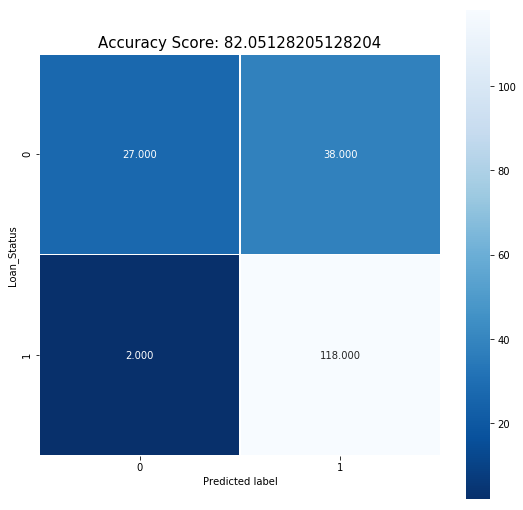

In [121]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Loan_Status');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);


In [122]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

NameError: name 'logreg' is not defined